# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Cargar data

- cargo

In [ ]:
df_data = pd.read_csv('./ds_pb_toTrain.csv', index_col=[0])

# Preprocesamiento rápido

- Resuelvo problemas con descriptores que tienen infinitos

- Elimino nulos sí o sí (la otra alternativa sería imputar)

# Split target y patrón

- Split

In [ ]:
df_data.columns

Index(['Ferroelectric_Tc_in_Kelvin', 'Tolerance_Factor',
       'Ionic_Displacements'],
      dtype='object')

In [ ]:
x = df_data.drop(["Ferroelectric_Tc_in_Kelvin"], axis=1)
y = df_data['Ferroelectric_Tc_in_Kelvin']

- Validación

In [ ]:
print(x.shape)
print(y.shape)

(132, 2)
(132,)


# Split train y test

- Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle = True)

- Validación

In [ ]:
print(X_train.shape)
print(X_test.shape)

(105, 2)
(27, 2)


# Escalamiento/Normalización de los datos 

- Instancio scaler para target y patron

In [ ]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler

- Escalo con fit sobre train, y trasnformo test

In [ ]:
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [ ]:
y_train = y_st_scaler.fit_transform(y_train.values.reshape(-1,1)) # escalo train
y_test = y_st_scaler.transform(y_test.values.reshape(-1,1)) #transformo test

# Entrenamiento del modelo con Linear Regression

- Importo modelo de Sklearn

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

- Instancio modelo

In [ ]:
model = HistGradientBoostingRegressor()

- Entreno

In [ ]:
model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor()

- Predigo

In [ ]:
y_pred = model.predict(X_test)

- Evaluación rápida

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
print("mae: \t", mae.round(4))
print("mse: \t", mse.round(4))
print("rmse: \t", rmse.round(4))
print("r2: \t", r2.round(4))

mae: 	 0.6244
mse: 	 0.8766
rmse: 	 0.9362
r2: 	 0.5118


- Import stats model para sacar p_value (Evaluación)

In [ ]:
import statsmodels.api as sm

- Stats summary

In [ ]:
y_test = y_test.reshape(-1)

In [ ]:
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

#dejar solo la 3,4,5,6,7,9,10

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.96e-07
Time:                        11:39:43   Log-Likelihood:                -28.837
No. Observations:                  27   AIC:                             63.67
Df Residuals:                      24   BIC:                             67.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1438      0.144     -0.999      0.3

- Residuales (resta entre reales y predichos)

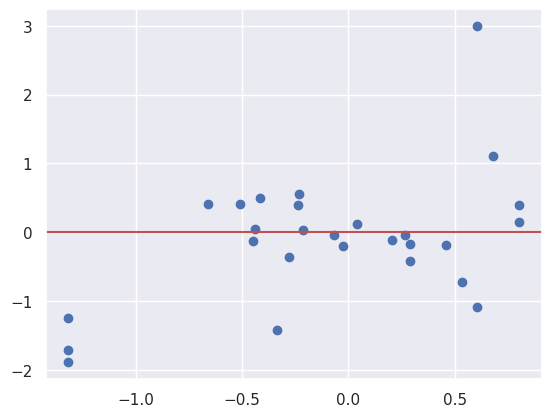

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Entrenamiento del modelo con Linear Regression

- Importo

In [ ]:
from sklearn.linear_model import LinearRegression

- Entreno y predigo

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

- Evaluacióon rápida

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.6278
mse:  0.6684


- Stats

In [ ]:
!pip install --upgrade setuptools --user python

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [ ]:
!pip install regressors

  Using cached regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in regressors setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from regressors import stats

ModuleNotFoundError: No module named 'regressors'

In [ ]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)

print("==========Summary==========")

# le paso modelo, datos de test y column names de los features
stats.summary(model, X_test, y_test, list(list(x)))

#el iintercepto esta muy elevdo, al igual que A,B, band gap, magnetic moment, y todas las valencias

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.0296 -0.3082 -0.0754 0.2838 2.0778


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept          -0.000000    0.157592  -0.0000  1.000000
Tolerance_Factor     0.301385    0.155321   1.9404  0.063249
Ionic_Displacements  0.650776    0.132852   4.8985  0.000044
---
R-squared:  0.62779,    Adjusted R-squared:  0.59677
F-statistic: 20.24 on 2 features


- Residuales

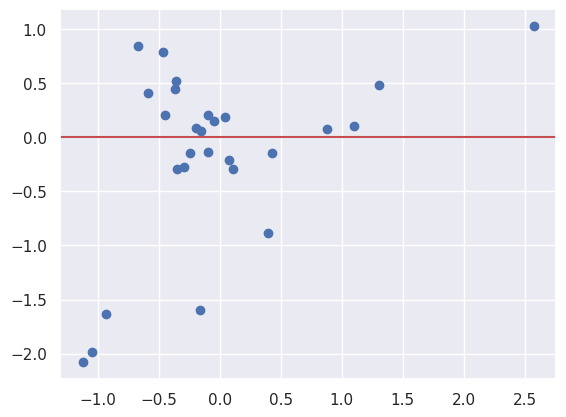

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Entrenamiento del modelo con Linear Regression

- Importo

In [ ]:
from sklearn import svm

- Entreno y predigo

In [ ]:
model = svm.SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Evaluacióon rápida

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.3684
mse:  1.1342


- Residuales

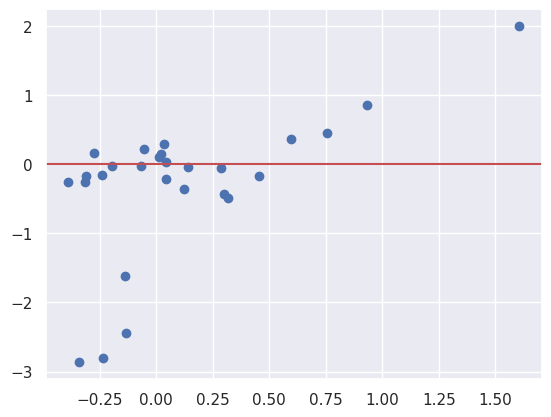

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Entrenamiento del modelo con Linear Regression

- Importo

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

- Entreno y predigo

In [ ]:
model = BaggingRegressor(base_estimator=SVR(),
                         n_estimators=100, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


- Evaluacióon rápida

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.3948
mse:  1.0868


- Residuales

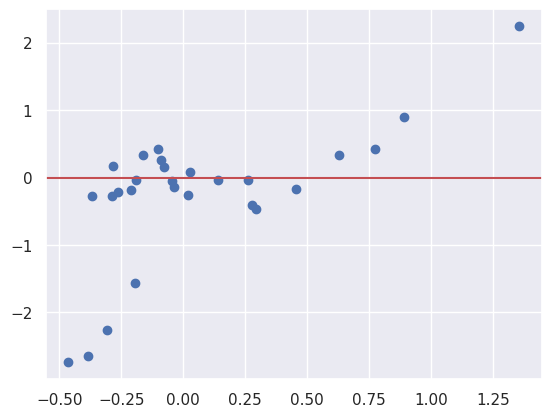

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Entrenamiento del modelo con Linear Regression

- Importo

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

- Entreno y predigo

In [ ]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

model = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Evaluacióon rápida

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8585
mse:  0.254


- Residuales

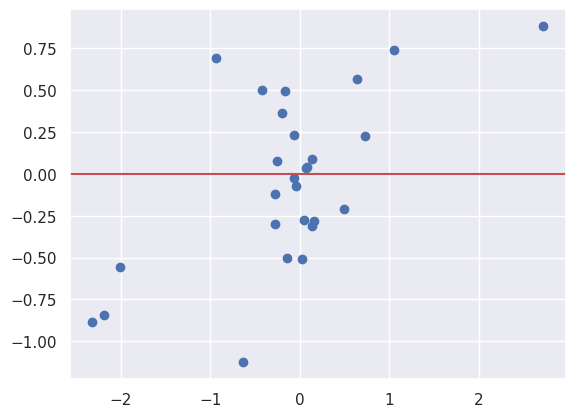

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Entrenamiento del modelo con Linear Regression

- Importo

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

- Entreno y predigo

In [ ]:
model = AdaBoostRegressor(random_state=0, n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Evaluacióon rápida

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8772
mse:  0.2205


- Residuales

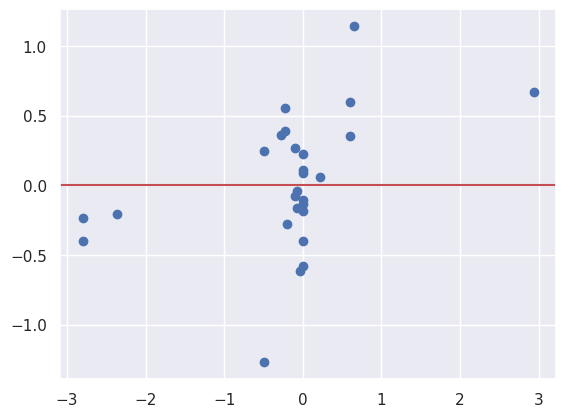

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1238d720-2ec8-40e1-ad99-9d2cd1c1fe59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>